<a href="https://colab.research.google.com/github/Adhithyan-1004/CODSOFT/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imbalanced-learn xgboost


Combined Dataset Shape: (38942, 23)
is_fraud
0.0    38740
1.0      200
Name: count, dtype: int64
After SMOTE:
 is_fraud
0.0    38740
1.0    38740
Name: count, dtype: int64

Random Forest Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7679
         1.0       1.00      1.00      1.00      7817

    accuracy                           1.00     15496
   macro avg       1.00      1.00      1.00     15496
weighted avg       1.00      1.00      1.00     15496

Random Forest ROC AUC: 0.9999990504232422


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7679
         1.0       1.00      1.00      1.00      7817

    accuracy                           1.00     15496
   macro avg       1.00      1.00      1.00     15496
weighted avg       1.00      1.00      1.00     15496

XGBoost ROC AUC: 0.999998767216139


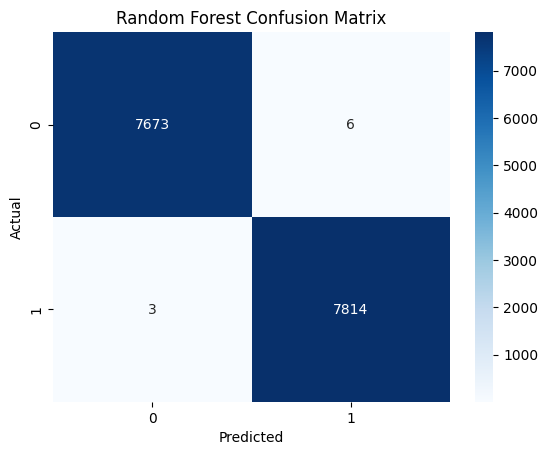

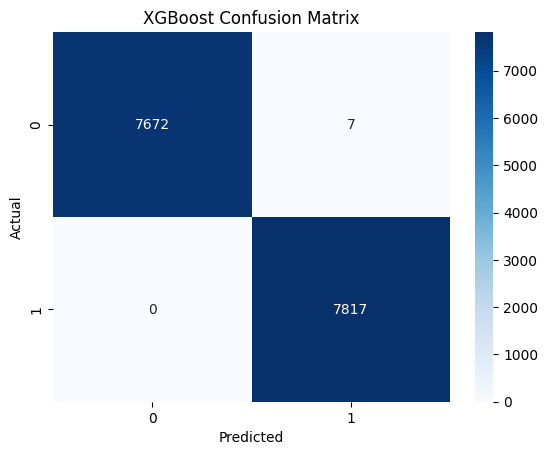

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Step 2: Load and Combine Datasets
train_df = pd.read_csv('/content/fraudTrain.csv')
test_df = pd.read_csv('/content/fraudTest.csv')
df = pd.concat([train_df, test_df], ignore_index=True)

print("Combined Dataset Shape:", df.shape)
print(df['is_fraud'].value_counts())

# Step 3: Preprocessing
df.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'dob', 'street', 'trans_num'], axis=1, inplace=True)

# Drop rows with NaN in 'is_fraud' column
df.dropna(subset=['is_fraud'], inplace=True)

# Encode Categorical Columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Feature & Target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Balance Classes using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("After SMOTE:\n", pd.Series(y_resampled).value_counts())

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\nRandom Forest Report:")
print(classification_report(y_test, rf_pred))
print("Random Forest ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

# Step 7: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("\nXGBoost Report:")
print(classification_report(y_test, xgb_pred))
print("XGBoost ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))

# Step 8: Confusion Matrices
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")
plot_conf_matrix(y_test, xgb_pred, "XGBoost Confusion Matrix")

✅ Combined Dataset Shape: (295170, 23)
✅ After SMOTE: is_fraud
0.0    293180
1.0    293180
Name: count, dtype: int64

🌲 Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     58730
         1.0       1.00      1.00      1.00     58542

    accuracy                           1.00    117272
   macro avg       1.00      1.00      1.00    117272
weighted avg       1.00      1.00      1.00    117272

ROC AUC: 0.9999948859447001


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:33:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🚀 XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     58730
         1.0       1.00      1.00      1.00     58542

    accuracy                           1.00    117272
   macro avg       1.00      1.00      1.00    117272
weighted avg       1.00      1.00      1.00    117272

ROC AUC: 0.9999118079229352


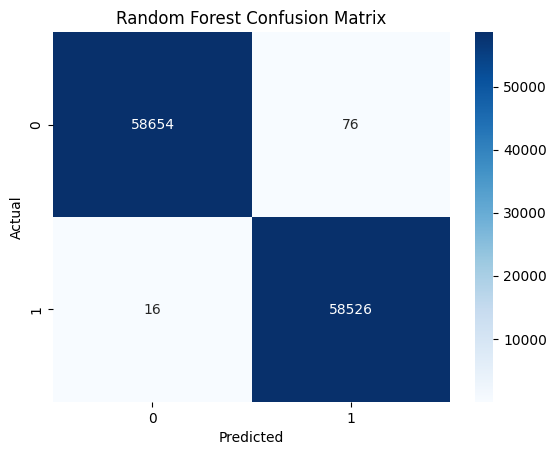

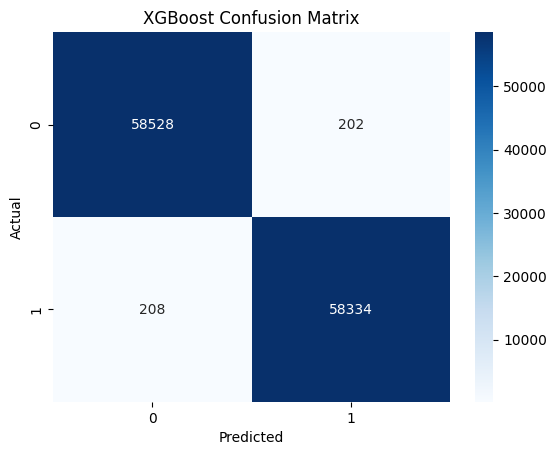


🧑‍💻 Test the model with your own transaction input
💵 Transaction Amount (amt): 245.50
🏙️ City Population (city_pop): 13423
⏱️ Unix Time (unix_time): 1325376000
🛒 Transaction Category (e.g., gas_transport): shopping_pos
🏪 Merchant (e.g., fraud_Kutch, Hermiston and Farrell): fraud_Kutch, Hermiston and Farrell
👤 Gender (M/F): M
💼 Job Title (e.g., Engineer): Engineer
📍 State (e.g., NY): NY
🌆 City (e.g., New York): New York

🔍 Prediction Result:
Fraud Probability: 0.00%
✅ NOT FRAUD


In [7]:
# Install required packages
!pip install imbalanced-learn xgboost

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Step 2: Load datasets (handle corrupted test file)
train_df = pd.read_csv('/content/fraudTrain.csv')
test_df = pd.read_csv('/content/fraudTest.csv') # Removed on_bad_lines and engine

# Step 3: Combine datasets
df = pd.concat([train_df, test_df], ignore_index=True)
print("✅ Combined Dataset Shape:", df.shape)

# Step 4: Preprocessing
# Drop irrelevant columns
df.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'dob', 'street', 'trans_num'], axis=1, inplace=True)

# Drop all rows with any NaN values
df.dropna(inplace=True)

# Label encode categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save encoders for user input

# Feature and target separation
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("✅ After SMOTE:", pd.Series(y_resampled).value_counts())

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("\n🌲 Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

# Step 8: Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("\n🚀 XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))

# Step 9: Confusion Matrix Plotting
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")
plot_conf_matrix(y_test, xgb_pred, "XGBoost Confusion Matrix")

# Step 10: User Input for Prediction
print("\n🧑‍💻 Test the model with your own transaction input")

# Get user input
user_input = {
    'amt': float(input("💵 Transaction Amount (amt): ")),
    'city_pop': int(input("🏙️ City Population (city_pop): ")),
    'unix_time': int(input("⏱️ Unix Time (unix_time): ")),
    'category': input("🛒 Transaction Category (e.g., gas_transport): "),
    'merchant': input("🏪 Merchant (e.g., fraud_Kutch, Hermiston and Farrell): "),
    'gender': input("👤 Gender (M/F): "),
    'job': input("💼 Job Title (e.g., Engineer): "),
    'state': input("📍 State (e.g., NY): "),
    'city': input("🌆 City (e.g., New York): ")
}

# Convert to DataFrame
input_df = pd.DataFrame([user_input])

# Encode using stored label encoders
for col in categorical_cols:
    le = label_encoders[col]
    try:
        input_df[col] = le.transform(input_df[col])
    except:
        input_df[col] = 0  # unknown category fallback

# Add any missing columns
for col in X.columns:
    if col not in input_df.columns:
        input_df[col] = 0

# Reorder columns
input_df = input_df[X.columns]

# Scale input
input_scaled = scaler.transform(input_df)

# Predict
fraud_prob = xgb.predict_proba(input_scaled)[0][1]
fraud_pred = xgb.predict(input_scaled)[0]

# Result
print("\n🔍 Prediction Result:")
print("Fraud Probability: {:.2f}%".format(fraud_prob * 100))
print("⚠️ FRAUD" if fraud_pred == 1 else "✅ NOT FRAUD")